## Login to Hugging Face

In [2]:
from dotenv import load_dotenv
import os
from huggingface_hub import login

load_dotenv()
token = os.getenv("HUGGINGFACE_TOKEN")
login(
    token=token, # ADD YOUR TOKEN HERE
    add_to_git_credential=True
)

Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /home/pathfinder/.cache/huggingface/token
Login successful


## Imports

In [3]:
import matplotlib.pyplot as plt

# huggingface
from transformers import AutoTokenizer

# datasets
import pandas as pd
from datasets import load_dataset

## Tokenizer

In [4]:
model_id = "upstage/SOLAR-10.7B-Instruct-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

## Dataset

In [5]:
dataset = load_dataset("MarkrAI/KoCommercial-Dataset")

In [6]:
# dataset information
dataset

DatasetDict({
    train: Dataset({
        features: ['input', 'instruction', 'output'],
        num_rows: 175454
    })
})

In [7]:
# dataset example
dataset["train"][0]

{'input': '',
 'instruction': '보드 게임 스피너는 $A$, $B$, $C$로 표시된 세 부분으로 나뉩니다. 스피너가 $A$에 떨어질 확률은 $\\frac{1}{3}$이고, 스피너가 $B$에 떨어질 확률은 $\\frac{5}{12}$입니다.  스피너가 $C$에 착륙할 확률은 얼마입니까? 답을 공통 분수로 표현하세요.',
 'output': '모든 가능한 결과의 확률의 합이 1$이므로, 스피너가 $C$에 착륙할 확률을 구하려면 스피너가 $A$와 $B$에 착륙할 확률을 1$에서 빼야 합니다. 이를 방정식으로 쓸 수 있습니다: $P(C) = 1 - P(A) - P(B)$. P(A) = \\frac{1}{3}$, $P(B) = \\frac{5}{12}$라는 것을 알고 있으므로 이 값을 방정식에 대입하여 단순화할 수 있습니다. 결과는 다음과 같습니다: P(C) = 1 - \\frac{1}{3} - frac{5}{12} = \\frac{12}{12} - frac{4}{12} - frac{5}{12} = \\frac{3}{12}$. 분자와 분모를 $3$로 나누면 이 분수를 줄일 수 있습니다: P(C) = \\frac{1}{4}$입니다.'}

In [8]:
def preprocess_instruction(examples):
    # Tokenize the instruction
    return tokenizer(examples["instruction"], padding="do_not_pad", truncation="do_not_truncate")

dataset = dataset.map(preprocess_instruction, batched=True)

In [9]:
# Number of 'input_ids' for instruction in the dataset
pd.Series([len(x) for x in dataset["train"]["input_ids"]]).describe()

count    175454.000000
mean         56.265944
std         116.458180
min           6.000000
25%          24.000000
50%          30.000000
75%          42.000000
max        6120.000000
dtype: float64

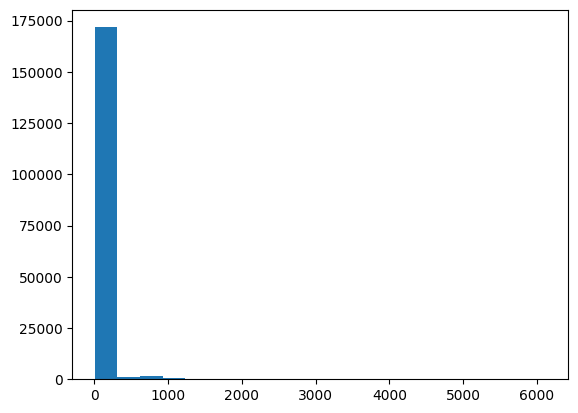

In [10]:
# visualizing the distribution of the number of 'input_ids' for instruction in the dataset
plt.hist([len(x) for x in dataset["train"]["input_ids"]], bins=20)
plt.show()

In [11]:
def preprocess_output(examples):
    # Tokenize the output
    return tokenizer(examples["output"], padding="max_length", truncation=True)

dataset = dataset.map(preprocess_output, batched=True)

In [12]:
# Number of 'input_ids' for output in the dataset
pd.Series([len(x) for x in dataset["train"]["input_ids"]]).describe()

count    175454.000000
mean        445.152103
std         227.137153
min           1.000000
25%         306.000000
50%         405.000000
75%         534.000000
max        5865.000000
dtype: float64

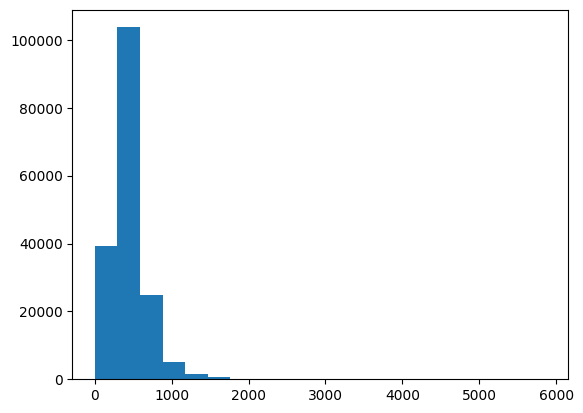

In [13]:
# visualizing the distribution of the number of 'input_ids' for output in the dataset
plt.hist([len(x) for x in dataset["train"]["input_ids"]], bins=20)
plt.show()